# Students' Social Media Addiction

In this notebook I will explore a data set that contains information about how long students spend on social media, what social media platforms they spend their time on most and how it affects their studies.

Data source: kaggle; https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

In [1]:
# importations 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["PYTHONWARNINGS"] = "ignore"

## Data Overview and Cleaning

In [2]:
data = pd.read_csv("Students Social Media Addiction.csv")
# Display the first few rows of the DataFrame
data.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
405,406,21,Male,Graduate,Turkey,4.7,Instagram,Yes,7.5,6,Single,3,7
120,121,20,Male,Undergraduate,Sri Lanka,5.9,Facebook,Yes,5.9,6,Single,3,7
384,385,19,Female,Undergraduate,Switzerland,3.3,Instagram,No,8.5,8,Single,2,4
191,192,22,Male,Graduate,India,4.8,Facebook,No,8.0,7,In Relationship,2,6
389,390,21,Male,Graduate,Canada,4.7,Instagram,Yes,7.5,6,Single,3,7


In [3]:
df = data.drop(columns=['Student_ID'], axis=1) # removing the Student_ID column

In [4]:
# data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 66.2+ KB


In [5]:
# statistical overview
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [6]:
df.loc[df.duplicated()] # check for duplicates


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
273,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7


In [7]:
# after removing the id column, i found duplicates.
df.loc[(df["Age"]==21) & (df["Country"]=="Italy") & (df["Mental_Health_Score"]==5) & (df["Mental_Health_Score"]==5) & (df["Relationship_Status"]=="Single") & (df["Avg_Daily_Usage_Hours"]==5.4)]

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
241,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7
273,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7


In [8]:
# looking at the duplicates with the id column, it shows that there are two students with the same data.
data.duplicated().sum()
data.iloc[[241, 273]]

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
241,242,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7
273,274,21,Male,Graduate,Italy,5.4,Instagram,Yes,6.7,5,Single,3,7


## Data Exploration

### Univariates (Distributions)

<Axes: xlabel='Age', ylabel='Count'>

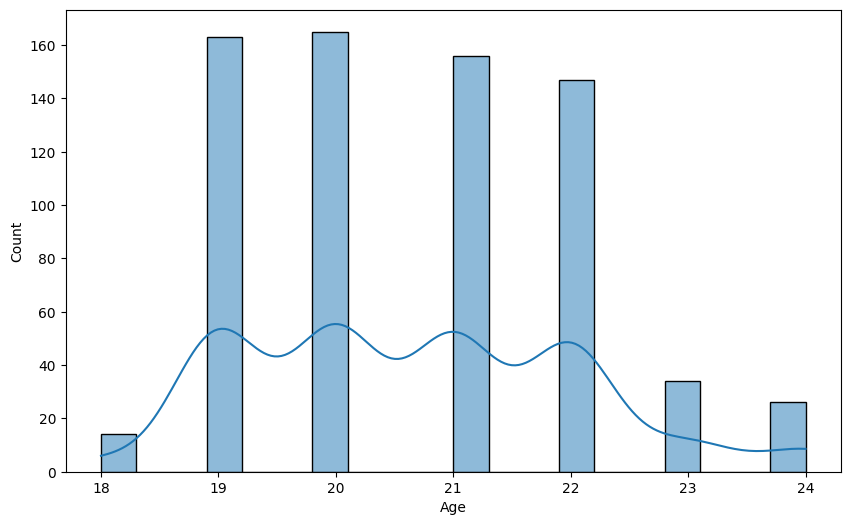

In [9]:
# distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)

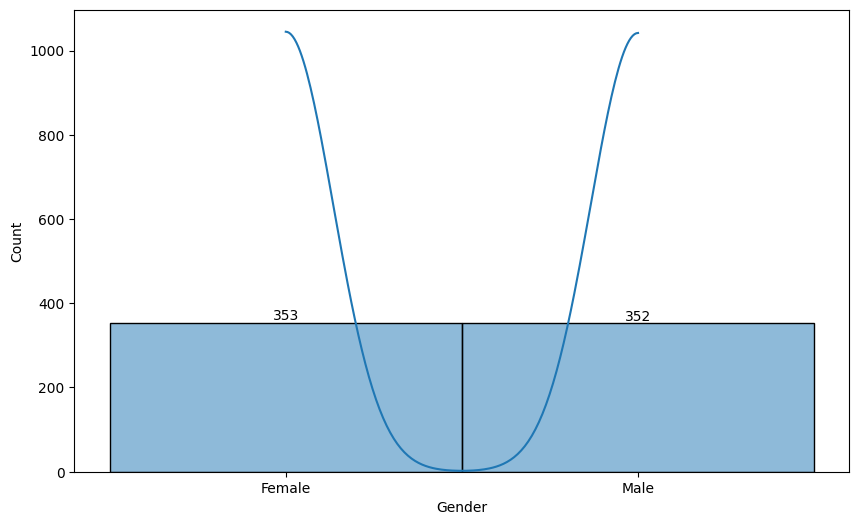

In [10]:
# distribution of gender
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Gender'], bins=20, kde=True)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, int(height), 
                ha='center', va='bottom')


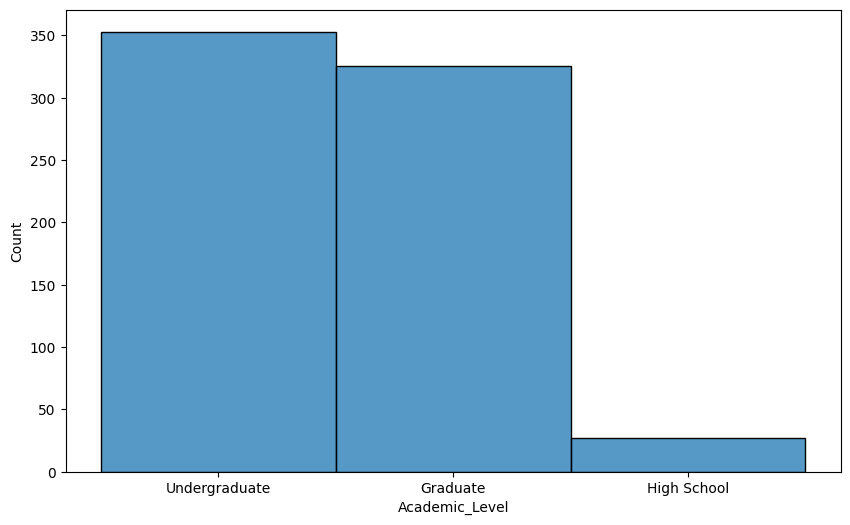

In [11]:
# distribution of academic level
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Academic_Level'], bins=20)

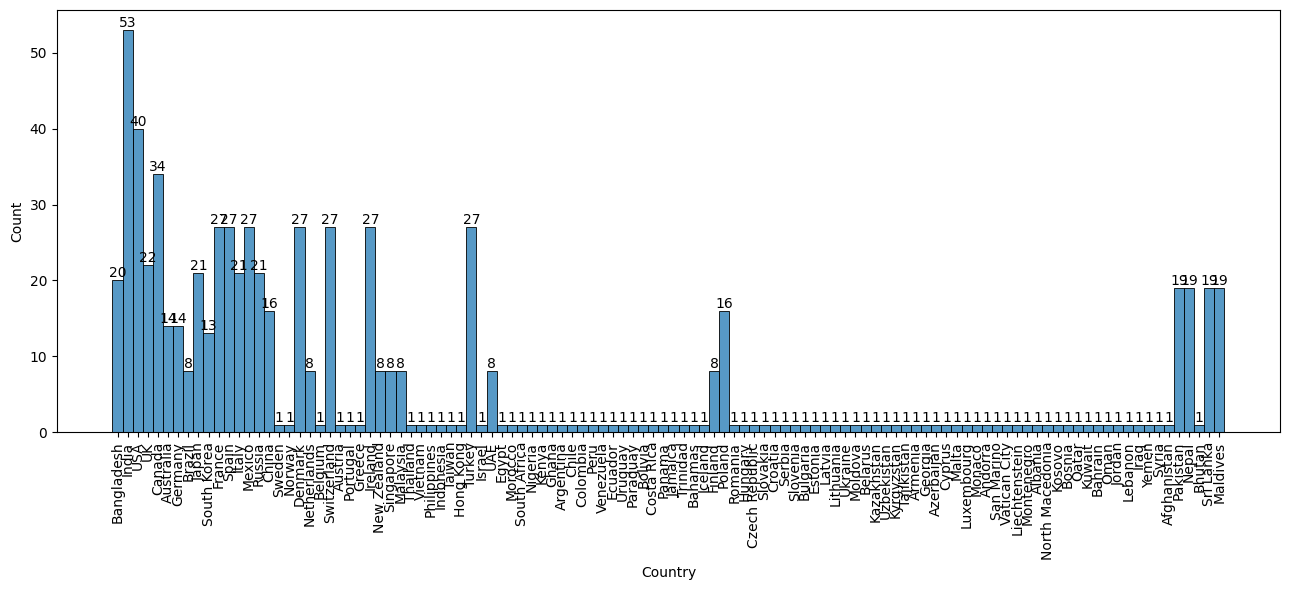

In [12]:
# distribution of individuals accross countries
plt.figure(figsize=(13, 6)) 
ax = sns.histplot(df['Country'], bins=20 )
# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, int(height), 
                ha='center', va='bottom')
plt.xticks(rotation=90)
plt.tight_layout()

The plot above has so many unique values to cover (110 to be specific), therefore it looks congested. 
I'll explore ways to make it look better.

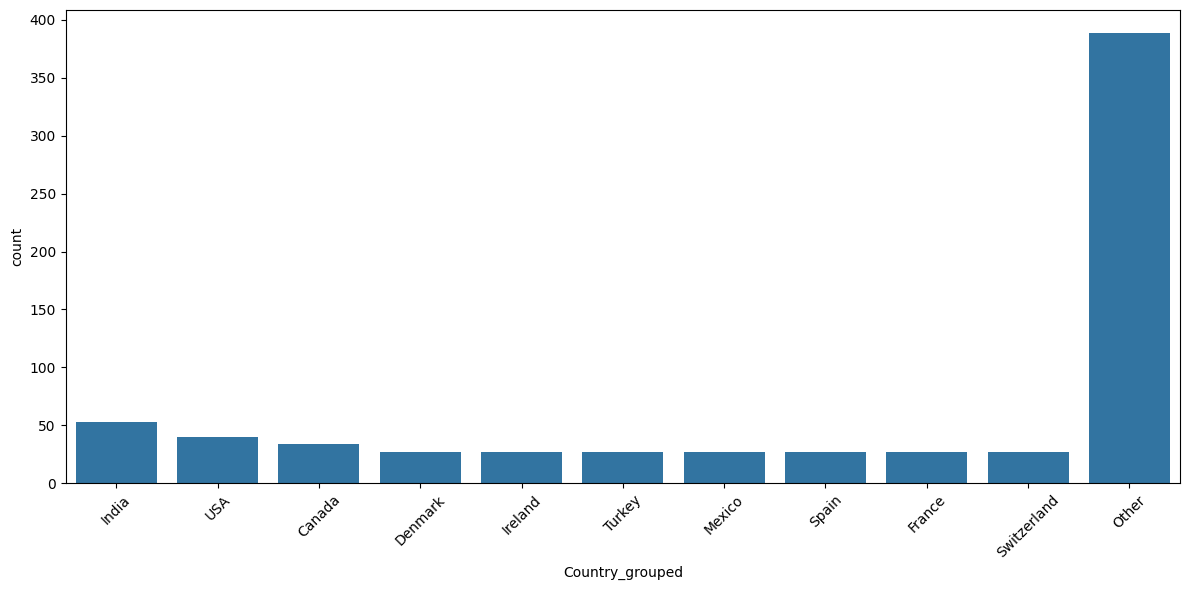

In [13]:
# Grouping countries for better visualization
top_countries = df['Country'].value_counts().nlargest(10)
df['Country_grouped'] = df['Country'].apply(lambda x: x if x in top_countries.index else 'Other')
plt.figure(figsize=(12, 6))
sns.countplot(x='Country_grouped', data=df, order=top_countries.index.tolist() + ['Other'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot above looks better, capturing the top 10 and categorizing the remaining as "other". 
My aim however is to try to capture all countries in one plot to properly see the distribution of countries.
I'll attempt to plot on a geographical map

In [14]:
import plotly.express as px

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    color_continuous_scale='Blues',
    title='Distribution of Students by Country'
)
fig.show()

## Bivariates

Text(0, 0.5, 'Social Media Platform')

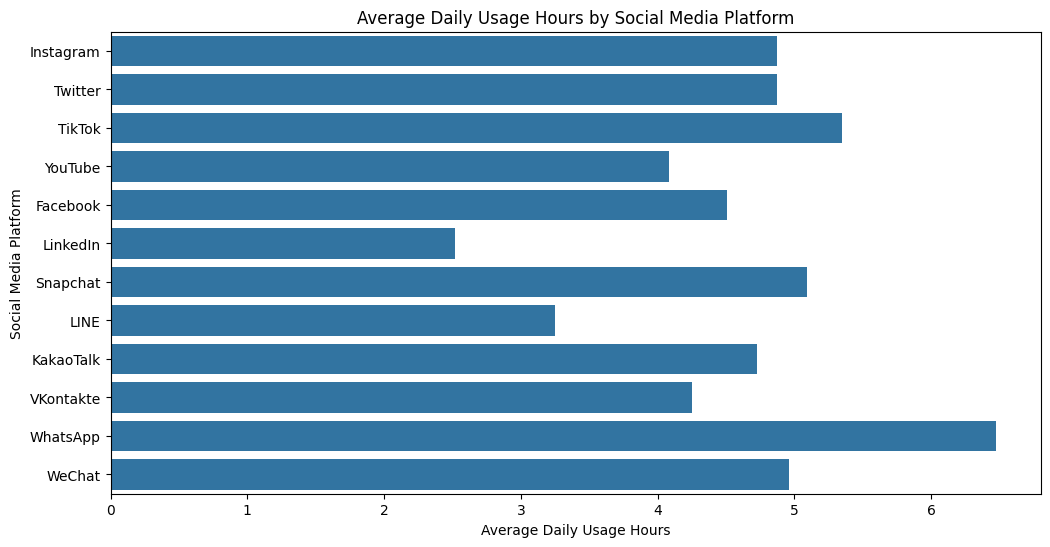

In [15]:
# most used social media platforms in hours
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Daily_Usage_Hours', y='Most_Used_Platform', data=df, estimator=np.mean, ci=None)
plt.title('Average Daily Usage Hours by Social Media Platform')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Social Media Platform')

Text(0, 0.5, 'Addiction Score')

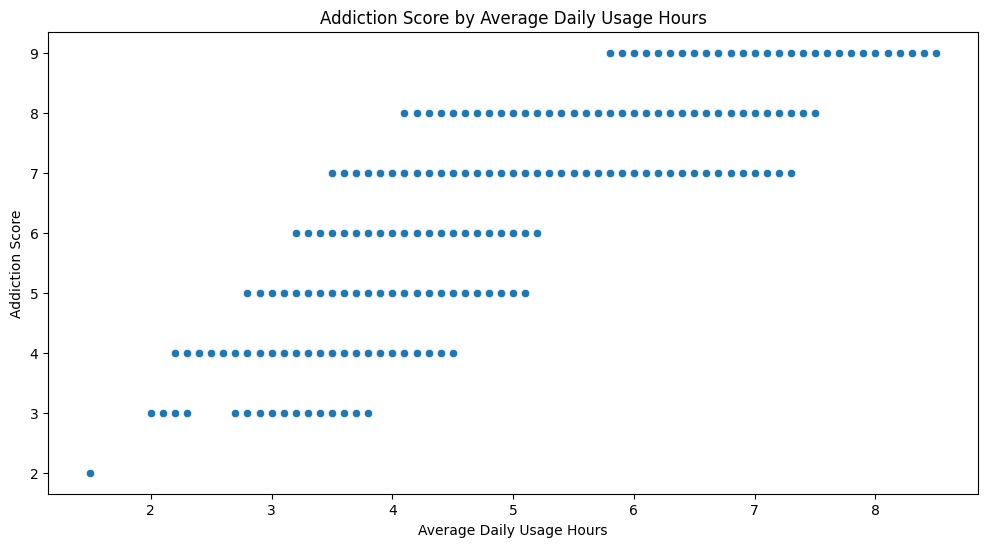

In [16]:
# hours of usage vs addiction score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df)
plt.title('Addiction Score by Average Daily Usage Hours')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addiction Score')


Text(0, 0.5, 'Affects Academic Performance (Yes/No)')

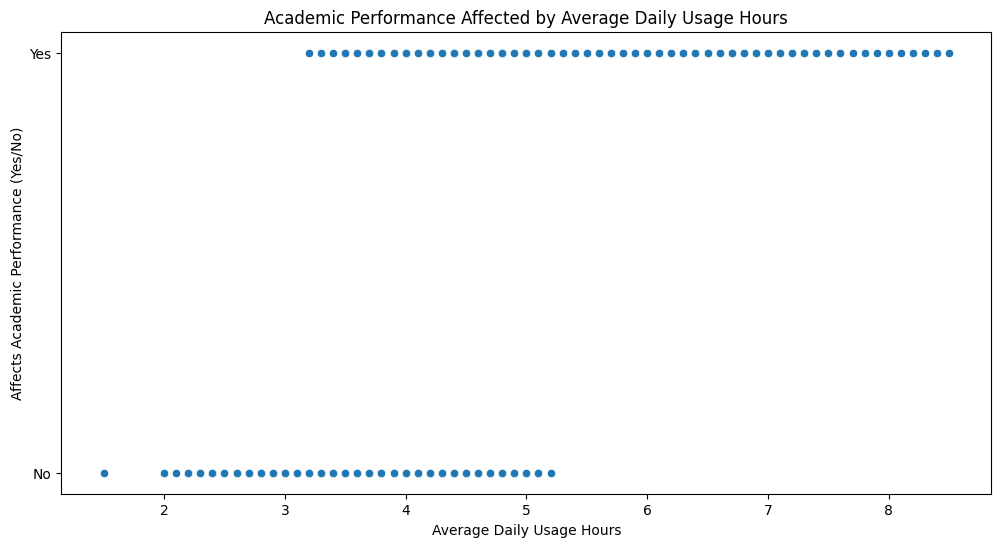

In [17]:
# usage hours vs accademic performance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Affects_Academic_Performance', data=df)
plt.title('Academic Performance Affected by Average Daily Usage Hours')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Affects Academic Performance (Yes/No)')

Text(0, 0.5, 'Mental Health Score')

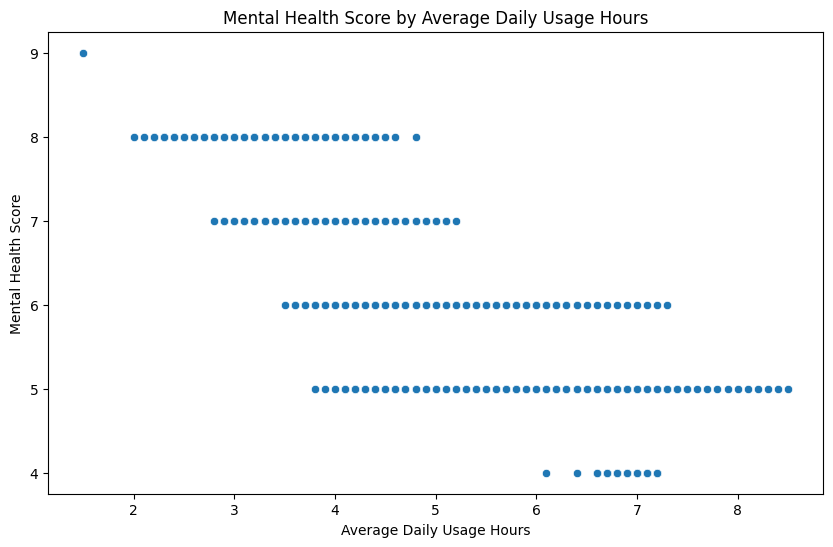

In [18]:
# hours of usage vs mental health score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df)
plt.title('Mental Health Score by Average Daily Usage Hours')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Mental Health Score')

Text(0.5, 0, 'Mental Health Score')

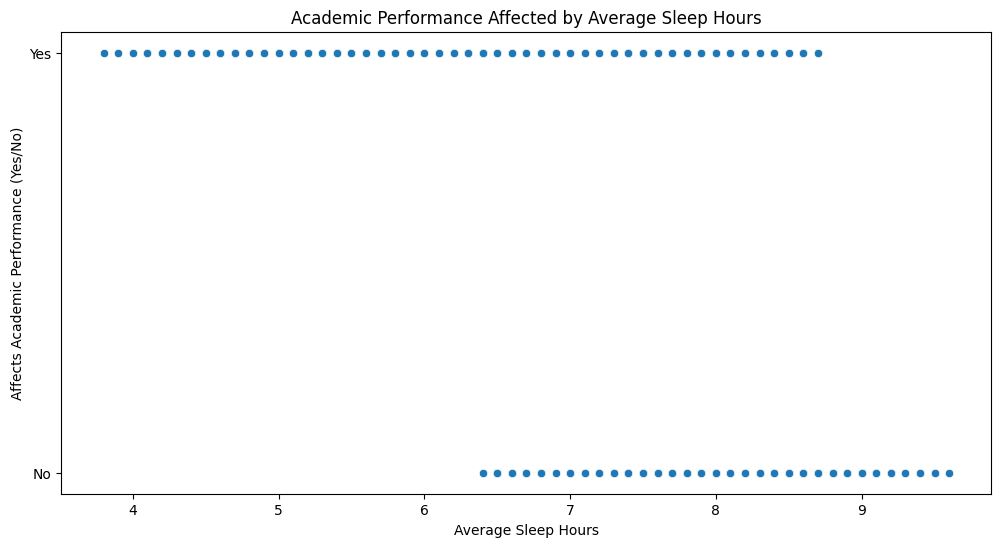

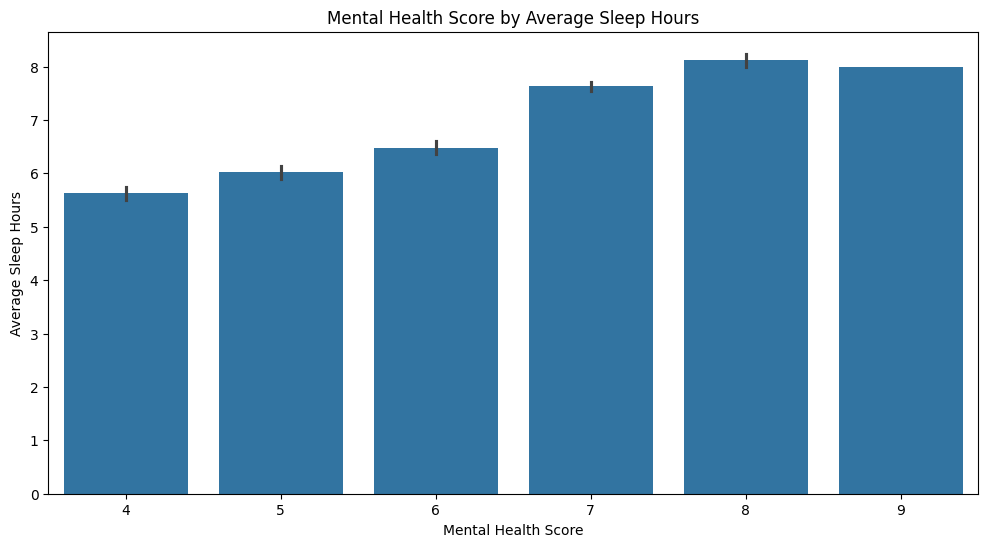

In [19]:
# accademic performance vs sleep hours
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep_Hours_Per_Night', y='Affects_Academic_Performance', data=df)
plt.title('Academic Performance Affected by Average Sleep Hours')
plt.xlabel('Average Sleep Hours')
plt.ylabel('Affects Academic Performance (Yes/No)')
# mental health score vs sleep hours
plt.figure(figsize=(12, 6))
sns.barplot(y='Sleep_Hours_Per_Night', x='Mental_Health_Score', data=df)
plt.title('Mental Health Score by Average Sleep Hours')
plt.ylabel('Average Sleep Hours')
plt.xlabel('Mental Health Score')

Text(0, 0.5, 'Mental Health Score')

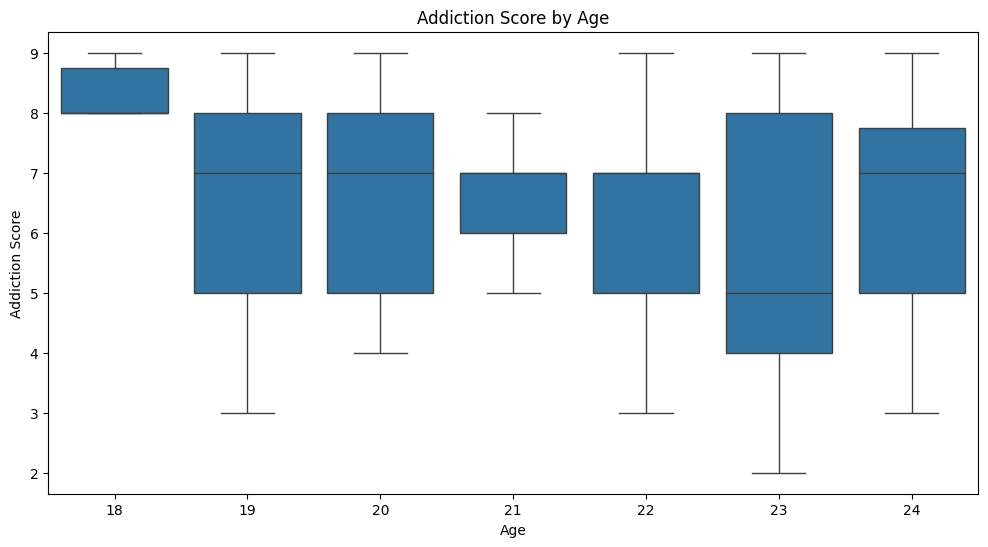

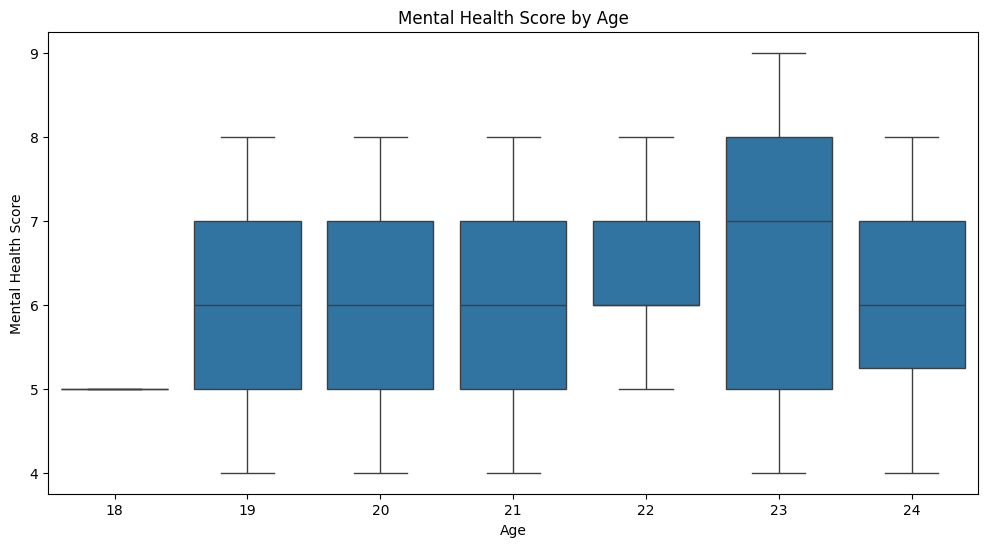

In [20]:
# age vs addiction score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Addicted_Score', data=df, showfliers=False)
plt.title('Addiction Score by Age')
plt.xlabel('Age')
plt.ylabel('Addiction Score')
# age vs mental health score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Mental_Health_Score', data=df, showfliers=False)
plt.title('Mental Health Score by Age')
plt.xlabel('Age')
plt.ylabel('Mental Health Score')

## Multivariates 

Text(0.5, 0.98, 'Age vs Gender vs Most Used Social Media Platform')

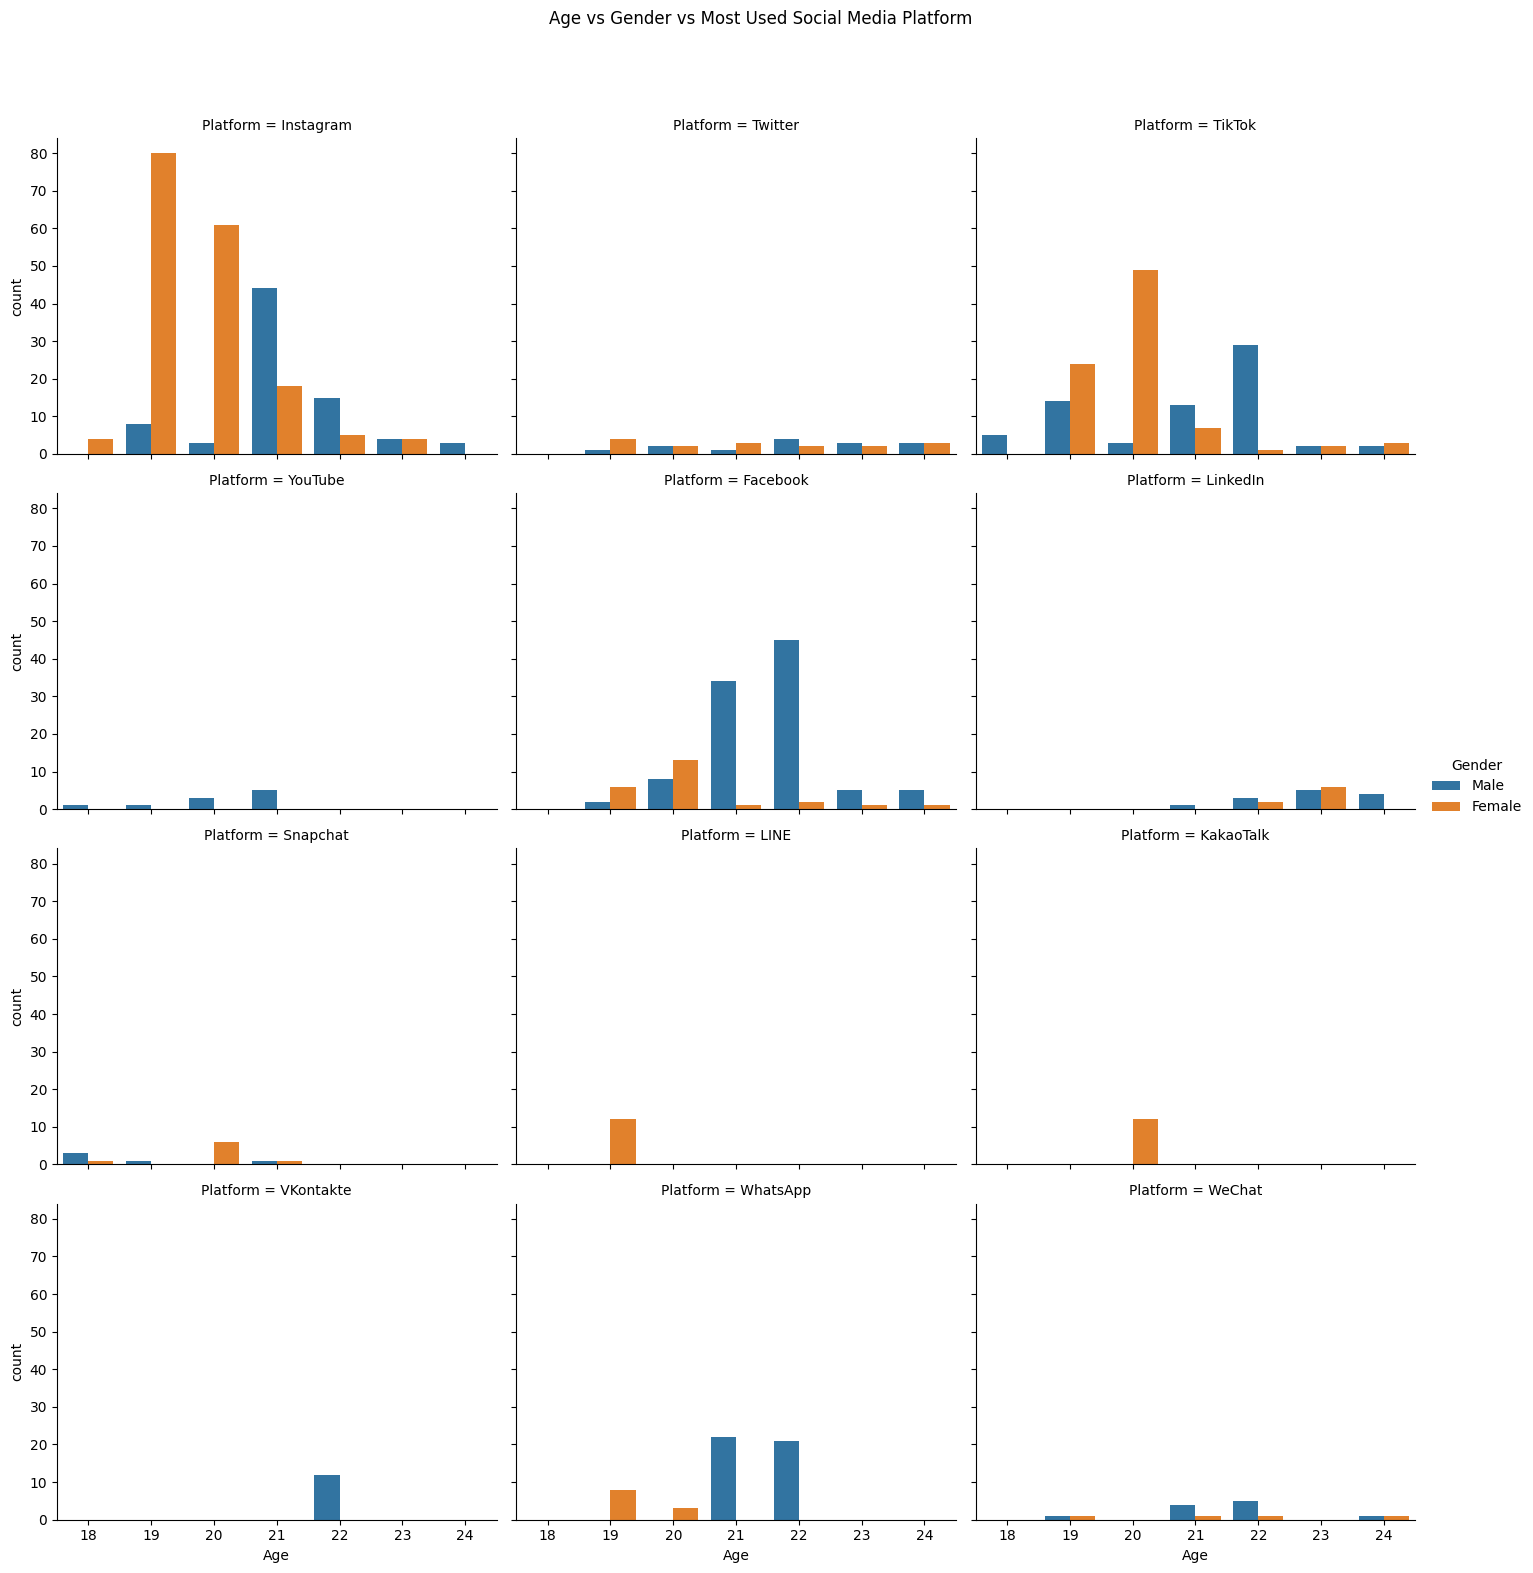

In [21]:
# Grouped bar plot: Age on x, count, hue by Gender, separate plots for Platform
df_platform = df.rename(columns={'Most_Used_Platform': 'Platform'})
sns.catplot(
    data=df_platform,
    x="Age",
    hue="Gender",
    col="Platform",
    kind="count",
    col_wrap=3,
    height=4,
    aspect=1.2
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Age vs Gender vs Most Used Social Media Platform")

# Predictive Analyisis 

A model to predict social media addiction of an individual

In [22]:
df_model = df.drop(columns=['Country_grouped', 'Country', 'Relationship_Status', 'Academic_Level', 'Gender'], axis=1)  # Drop columns that are not needed
df_model.info()  # Display DataFrame information after all operations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Avg_Daily_Usage_Hours         705 non-null    float64
 2   Most_Used_Platform            705 non-null    object 
 3   Affects_Academic_Performance  705 non-null    object 
 4   Sleep_Hours_Per_Night         705 non-null    float64
 5   Mental_Health_Score           705 non-null    int64  
 6   Conflicts_Over_Social_Media   705 non-null    int64  
 7   Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.2+ KB


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2071
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 11
[LightGBM] [Info] Start training from score 6.453901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

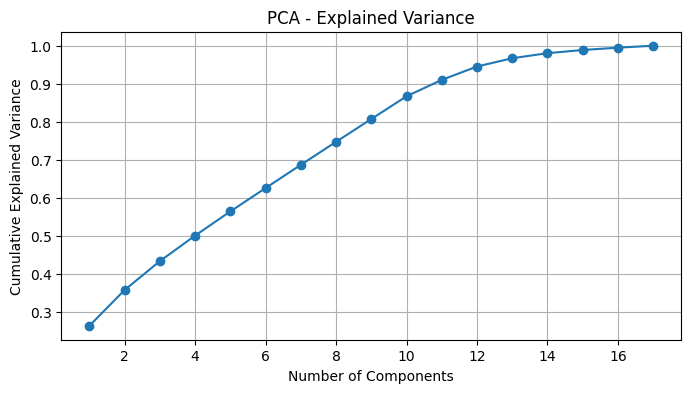

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Most_Used_Platform', 'Affects_Academic_Performance']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Feature scaling
from sklearn.preprocessing import StandardScaler

features = df_encoded.drop('Addicted_Score', axis=1)
target = df_encoded['Addicted_Score']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(features_scaled)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)

# Choose number of components (to explain 90% variance)
n_components = (pca.explained_variance_ratio_.cumsum() < 0.90).sum() + 1
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features_scaled)

# Model selection with Lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, random_state=42)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [25]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.98,0.98,0.24,0.17
HistGradientBoostingRegressor,0.97,0.98,0.24,0.67
ExtraTreesRegressor,0.97,0.98,0.24,0.45
RandomForestRegressor,0.97,0.98,0.25,0.81
BaggingRegressor,0.97,0.97,0.26,0.13
GradientBoostingRegressor,0.97,0.97,0.27,0.59
XGBRegressor,0.97,0.97,0.28,0.37
DecisionTreeRegressor,0.96,0.96,0.30,0.03
LinearSVR,0.95,0.95,0.34,0.04


I will use the HistGradientBoostingRegressor, even though its second the LGBMRegressor is first but there are too many warnings, so ill go with the second best model.

RMSE: 0.058
MAE: 0.127
R²: 0.977


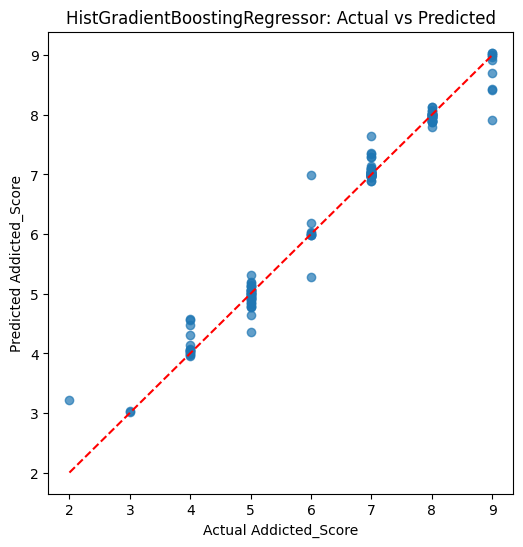

In [30]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the model
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train)

# Predict on test data
y_pred = hgb.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

# Optional: Plot predicted vs actual
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Addicted_Score")
plt.ylabel("Predicted Addicted_Score")
plt.title("HistGradientBoostingRegressor: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

---
## Students' Social Media Addiction: Project Documentation

---

### 1. **Importing Libraries**
We started by importing all necessary Python libraries for data analysis and visualization.

---

### 2. **Loading and Previewing Data**
We loaded the dataset and previewed a sample to understand its structure.

---

### 3. **Data Cleaning**
- Removed the `Student_ID` column to focus on relevant features.
- Checked for and explored duplicate records.
- Noted that some students had identical data.

---

### 4. **Univariate Analysis**
- Visualized the distribution of age, gender, and academic level using histograms.
- Plotted the distribution of students across countries.

**Challenge:**  
The country distribution plot was unreadable due to 110 unique values.

**Solution:**  
Grouped countries, showing only the top 10 and labeling the rest as "Other". Rotated x-axis labels for clarity.

---

### 5. **Geographical Visualization**
**Challenge:**  
Needed to visualize all countries without congestion.

**Solution:**  
Used Plotly’s choropleth map to show the distribution of students by country.

**Challenge:**  
Plotly and nbformat were not installed in the correct Python environment.

**Solution:**  
Installed the packages using the full path to the Python executable and restarted the Jupyter kernel.

---

### 6. **Bivariate Analysis**
- Explored relationships such as:
  - Most used social media platform vs. average daily usage hours
  - Usage hours vs. addiction score
  - Usage hours vs. academic performance
  - Usage hours vs. mental health score
  - Sleep hours vs. academic performance and mental health

---

### 7. **Multivariate Analysis**
- Visualized age, gender, and most used social media platform together using a grouped bar plot.
- Temporarily renamed the column for easier plotting.

---

### **Summary of Challenges and Solutions**
- **Congested plots:** Solved by grouping categories and rotating labels.
- **Plotly/nbformat errors:** Solved by installing packages in the correct Python environment and restarting the kernel.
- **Column renaming for plotting:** Used a temporary DataFrame with the desired column name.


---
### 8. **Model Building and Evaluation**

---

#### **Data Preparation for Modeling**
- Encoded categorical variables (such as Gender, Most Used Platform, Relationship Status, Academic Level, and Affects Academic Performance) into numeric format using one-hot encoding.
- Standardized all features so they contributed equally to the analysis.

---

#### **Principal Component Analysis (PCA)**
- Applied PCA to reduce the dimensionality of the dataset.
- Determined the number of principal components needed to explain at least 90% of the variance.
- Transformed the original features into these principal components, keeping only the most important information for prediction.

---

#### **Model Selection with Lazypredict**
- Used Lazypredict to automatically train and compare multiple regression models for predicting "Addicted_Score".
- Reviewed the performance of each model using metrics such as RMSE, MAE, and R².
- Selected the **HistGradientBoostingRegressor** model for its strong performance and reliability.

---

#### **Model Training and Evaluation**
- Trained the HistGradientBoostingRegressor on the training data.
- Evaluated the model on the test data using RMSE, MAE, and R² metrics.
- Achieved excellent results:
  - **RMSE:** 0.058 (very low error)
  - **MAE:** 0.127 (very low average error)
  - **R²:** 0.977 (model explains 98% of the variance in Addicted_Score)

---

#### **Summary**
- The model building process included careful data preparation, dimensionality reduction, and automated model selection.
- The final model is highly accurate and suitable for predicting students’ social media addiction scores.
- These results provide strong support for insights and visualizations in Tableau.
